In [1]:
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.1/480.1 KB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 95.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 106.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 100.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.regression import *
mpl.rcParams['figure.dpi'] = 300

## Loading the data
Health Insurance Data where age, sex, bmi, children, smoker, and region are features and charges is a target.

charges are nothing but the billed charges for every individual based on features.

We will create a model that will predict the charges column.

In [23]:
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
data.shape

(1338, 7)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


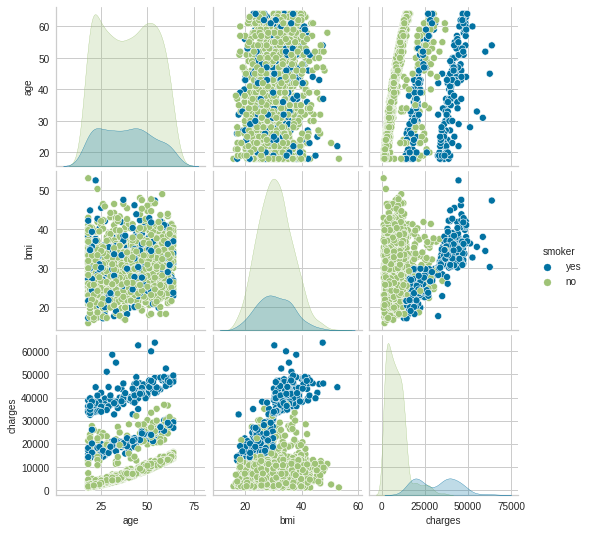

In [26]:
numeric = ['age', 'bmi', 'charges', 'smoker']

sns.pairplot(data[numeric], hue='smoker')
plt.show()

## Data Viz
we use hue mapping to highlight the differences between smokers and non-smokers. As we can see, age is correlated with charges, i.e, people get higher charges as they grow older. In spite of that, being a non-smoker keeps the cost lower for most people, regardless of their age. Furthermore, overweight and obese people don't seem to get significantly higher charges, unless they are smokers.

In [12]:
numeric = ['age', 'bmi', 'children', 'charges']
categorical = ['smoker', 'sex', 'region']

## Initialize the PyCaret

In [27]:
reg = setup(
    data = data,
    target= 'charges',
    train_size = 0.8,
    session_id = 7402,
    normalize = True
)

,Description,Value
0,Session id,7402
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(1070, 10)"
6,Transformed test set shape,"(268, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [28]:
best = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2656.3068,22807785.5399,4752.0577,0.8354,0.4417,0.3174,0.2020
lightgbm,Light Gradient Boosting Machine,2955.1778,25348692.0979,5007.8170,0.8175,0.5352,0.3695,0.2890
rf,Random Forest Regressor,2842.1539,25330245.8602,5009.2903,0.8183,0.4737,0.3391,0.6000
ada,AdaBoost Regressor,4179.8429,27265729.1659,5200.2806,0.8047,0.6074,0.6936,0.1240
et,Extra Trees Regressor,2784.7362,27475673.3414,5221.6402,0.8004,0.4783,0.3144,0.3580
knn,K Neighbors Regressor,3545.4472,32495312.4000,5674.7564,0.7664,0.5011,0.3736,0.1180
lr,Linear Regression,4194.9295,37414384.4019,6105.3998,0.7296,0.5909,0.4186,0.3380
llar,Lasso Least Angle Regression,4182.3133,37421389.4313,6105.9636,0.7294,0.5463,0.4179,0.1160
lar,Least Angle Regression,4186.6346,37436076.6437,6107.0826,0.7293,0.5847,0.4184,0.1430
lasso,Lasso Regression,4187.6626,37445026.9359,6107.8280,0.7292,0.5967,0.4184,0.1140


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [29]:
model = create_model('gbr', fold= 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2769.0773,24842720.2591,4984.2472,0.8378,0.4201,0.2885
1,2940.4457,28315108.4822,5321.1943,0.7484,0.5487,0.4752
2,2993.9150,23821042.4759,4880.6805,0.8432,0.4964,0.3497
3,2654.7213,23770948.5261,4875.5460,0.8282,0.4335,0.2721
4,2659.2620,19471379.7542,4412.6386,0.8280,0.4790,0.3525
5,2188.4676,17611726.9494,4196.6328,0.9046,0.3352,0.2429
6,3082.2213,31084621.7803,5575.3584,0.8263,0.4666,0.3319
7,2331.9915,16502414.8981,4062.3164,0.8924,0.3732,0.2916
8,2314.7058,18220251.7507,4268.5187,0.8193,0.4014,0.3016


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Fine Tuning the Model

In [30]:
params = {
    'learning_rate': [0.01, 0.02, 0.05],
    'max_depth': [1,2,3,4,5,6,7,8],
    'subsample': [0.4, 0.5, 0.6, 0.7, 0.8],
    'n_estimators': [100,200.300,400,500,600]
}

In [31]:
tuned_model = tune_model(
    model,
    optimize='RMSE',
    fold=10,
    custom_grid=params,
    n_iter= 30
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2657.9990,22645032.5575,4758.6797,0.8521,0.4086,0.3041
1,2859.6543,27389932.9309,5233.5392,0.7567,0.5303,0.4509
2,2776.6200,20537228.9324,4531.8020,0.8649,0.4274,0.3145
3,2683.3459,22189498.0508,4710.5730,0.8396,0.4228,0.2838
4,2518.8314,17616627.0000,4197.2166,0.8444,0.4432,0.3398
5,2317.6998,17846240.7217,4224.4811,0.9034,0.3486,0.2745
6,2838.6356,28352946.6290,5324.7485,0.8416,0.4461,0.3129
7,2399.5835,16430451.1495,4053.4493,0.8929,0.4010,0.3372
8,2331.9525,16493984.2248,4061.2786,0.8364,0.3999,0.3272


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/pycaret/internal/pipeline.py", line 252, in fit
    fitted_estimator = self._memory_fit(
  File "/usr/local/lib/python3.8/dist-packages/joblib/memory.py", line 594, in __call__
    return self._cached_call(args, kwargs)[0]
  File "/usr/local/lib/python3.8/dist-packages/

## Making Predictions and Saving the Model

In [32]:
predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2380.4352,17267767.8244,4155.4504,0.8892,0.4090,0.3057


,age,sex,bmi,children,smoker,region,charges,prediction_label
1070,47,male,19.190001,1,no,northeast,8627.541016,9198.764395
1071,27,male,26.030001,0,no,northeast,3070.808594,4970.680556
1072,54,male,30.209999,0,no,northwest,10231.500000,12877.941318
1073,56,male,33.630001,0,yes,northwest,43921.183594,43921.188119
1074,43,female,26.700001,2,yes,southwest,22478.599609,24340.099972
...,...,...,...,...,...,...,...,...
1333,45,male,28.700001,2,no,southwest,8027.967773,9302.785305
1334,55,female,29.700001,2,no,southwest,11881.358398,13821.128928
1335,22,male,28.879999,0,no,northeast,2250.835205,3656.733761
1336,61,male,28.309999,1,yes,northwest,28868.664062,30204.941009


In [33]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [34]:
final_model = finalize_model(model)
save_model(final_model, 'insurance_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker...
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': no     0
 yes    1
 NaN   -1
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['region'],
                                     trans